In [1]:
# Ingest the Cold Tongue Index (CTI) Sea Surface Temperature (SST),
# defined as the mean SST for 6N-6S, 180W-90W in the equatorial Pacific 
# minus the global-mean SST; the global-mean SST; calculate anomalies; and plot.
#
# Todd MItchell, February 2022

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.interactive(True)
# You need the following line, '%matplotlib inline', to display figures in
# jupyter notebooks.  You get an error message if you omit it and try to
# plot a figure.
# %matplotlib  inline 

import sys
sys.path.insert( 0, '/Users/mitchell/Documents/PYTHON/modules/mitchell/' )
import tpm  # A module of my functions for calculations and plotting
from subprocess import call
# call( 'unix command' ) # with quotes, will execute the UNIX command
# --- lots of error messages and no answer
import os
# os.system( 'unix command' ) # with quotes, will execute the UNIX command
# It seems that one needs to do more when executing the "os" command in a jupyter notebook:
# print(os.popen('ls -l *nc').read())  works!
# os.popen( 'pwd' ).read()  works!

import pandas as pd

In [2]:
os.popen( 'ls -l cti*.nc' ).read()

'-rw-r--r--  1 mitchell  staff  346205 Feb 25 16:59 cti1854jan2022.nc\n'

In [2]:
# This cell has code you will need to ingest netCDF format files
import netCDF4 as nc
a = nc.Dataset( 'cti1854jan2022.nc' )
varnam = 'sst'
fdat  = np.array( a.variables[  varnam ] )
fdat[ fdat==a.variables[  varnam ].missing_value  ] = np.nan
f"The units are {a.variables[varnam].units}"


/Users/mitchell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


'The units are degC'

In [3]:
ts = fdat   # I am calling the CTI sst timeseries "ts"
ts.shape

(2017,)

In [4]:
yr1 = 1854
yr2 = 2022
ts = tpm.fill_year( ts)  # The last year of data ends in January.  Fill last year with NaNs

In [5]:
ts.shape[0]

2028

In [6]:
ts

array([8.39809418, 8.61637115, 9.125103  , ...,        nan,        nan,
              nan])

In [7]:
ts = tpm.time_shift( ts, yr1, yr2, 1950, yr2 ) # Retain only the years 1950-2022
yr1 = 1950
tsanom, tsclim = tpm.anomalies( ts ) # Calculate anomalies by calendar month

yr1, yr1clim, yr2clim, skip, nt2
 1 1 73 0 876


In [8]:
tsanom

array([-1.1902585 , -0.99060411, -0.64579606, -0.70539215, -0.86228744,
       -0.6173349 , -0.49276413, -0.36218378, -0.48320911, -0.42206724,
       -0.69662126, -0.58472811, -0.41220712, -0.30894632,  0.11624122,
        0.32549927,  0.43401535,  0.46460289,  0.8311647 ,  0.6725395 ,
        0.75420811,  0.80706827,  0.96715132,  0.71783079,  0.45081664,
        0.26683455,  0.23051429,  0.3273761 ,  0.16116532, -0.12546592,
       -0.24388183, -0.10550043, -0.04919002, -0.17244681, -0.35479959,
       -0.06431185,  0.36170912,  0.46512061,  0.50014663,  0.54921982,
        0.59117707,  0.65600724,  0.50315415,  0.46133497,  0.57557919,
        0.49894945,  0.4938275 ,  0.67057051,  0.50652266,  0.37789374,
        0.06545997, -0.6743882 , -0.49605362, -0.55845504, -0.62978615,
       -0.73427698, -0.91505191, -0.90293463, -0.66140207, -0.78253924,
       -0.38137483, -0.31051225, -0.47297502, -0.52190902, -0.70280067,
       -0.61957222, -0.58091034, -0.69514582, -0.88408038, -1.45

(-43.64, 907.64)


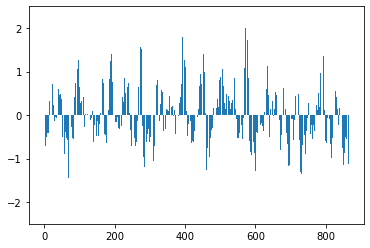

In [9]:
# Make a plot of the CTI anomalies
nt = tsanom.shape[0]
plt.clf()
plt.bar( np.arange(nt), tsanom )
print( plt.gca().get_xlim() )
plt.gca().set_ylim( ( -2.5, 2.5 ))
plt.savefig( 'cti19502022.png', dpi=300 )
plt.show()


In [10]:
# Apply a 9-point running mean
df = pd.DataFrame( tsanom, columns=['anom'] )
df[ 'anomsm' ] = df.iloc[:,0].rolling( 9, center=True ).mean()
tsanomsm = df[ 'anomsm' ].to_numpy() 

In [11]:
# A 9-point running mean shortens the series by 4 time points.
tsanomsm # Ends October 2021
tsanom   # Ends Jamuary 2022
np.nanmax( abs(tsanomsm) )

1.8728659366283162

<Figure size 432x288 with 0 Axes>

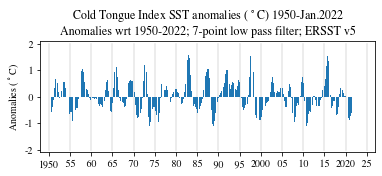

In [12]:
# Plot the smoothed CTI series
font = {'family': 'times' }
plt.clf()
fig, ax = plt.subplots()
plt.bar( np.arange(nt), tsanomsm, zorder=10 )
plt.gca().set_ylim( ( -2.1, 2.1 ))
plt.gca().set_xlim( ( -24, nt+48 ))
xtick_values = np.arange( 0, nt+60, step=60 ) 
plt.xticks( xtick_values, ('1950', ' 55 ', ' 60 ', ' 65 ', \
  ' 70 ', ' 75 ', ' 80 ', ' 85 ', ' 90 ', ' 95 ', '2000', ' 05 ', \
  ' 10 ', ' 15 ', '2020', ' 25 ' ), fontdict=font )
plt.yticks( np.arange(-2,3,1), ( '-2', '-1', ' 0', ' 1', ' 2' ), fontdict=font )
tpm.plot_vertical_lines( xtick_values,( -2, 2 ), zorder=5 )
plt.title( r'Cold Tongue Index SST anomalies ($^\circ$C) 1950-Jan.2022' 
          '\n' 
          r'Anomalies wrt 1950-2022; 7-point low pass filter; ERSST v5', \
          fontdict=font )
ax.set_aspect(75) 
plt.ylabel( 'Anomalies ($^\circ$C)', fontdict=font )
# plt.savefig( 'cti19502022sm.png', dpi=750 )
plt.show()

In [13]:
# Ingest the global-mean SST, calculate anomalies, and smooth with a 5-year running mean
b = nc.Dataset( 'b.nc' )
varnam = 'sst'
fdatb  = np.array( b.variables[ varnam ] )
fdatb[ fdatb==b.variables[  varnam ]._FillValue  ] = np.nan
tsb = fdatb
tsb = tpm.fill_year( tsb )  # Fill last year with NaNs
tsb = tpm.time_shift( tsb, 1854, yr2, 1950, yr2 ) # Retain only the years 1950-2022
tsbanom, tsbclim = tpm.anomalies( tsb ) # Calculate anomalies by calendar month
dfb = pd.DataFrame( tsbanom, columns=['anom'] )
dfb[ 'anomsm' ] = dfb.iloc[:,0].rolling( 121, center=True ).mean()
tsbanomsm = dfb[ 'anomsm' ].to_numpy() 

yr1, yr1clim, yr2clim, skip, nt2
 1 1 73 0 876


/Users/mitchell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

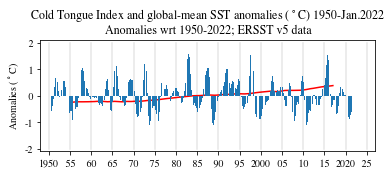

In [18]:
# Plot smoothed CTI and global-mean SST anomalies
plt.clf()
fig, ax = plt.subplots()
plt.bar( np.arange(nt), tsanomsm, zorder=15 )
plt.plot( np.arange(nt), tsbanomsm, zorder=10, color='red' )
plt.gca().set_ylim( ( -2.1, 2.1 ))
plt.gca().set_xlim( ( -24, nt+48 ))
xtick_values = np.arange( 0, nt+60, step=60 ) 
plt.xticks( xtick_values, ('1950', ' 55 ', ' 60 ', ' 65 ', \
  ' 70 ', ' 75 ', ' 80 ', ' 85 ', ' 90 ', ' 95 ', '2000', ' 05 ', \
  ' 10 ', ' 15 ', '2020', ' 25 ' ), fontdict=font )
plt.yticks( np.arange(-2,3,1), ( '-2', '-1', ' 0', ' 1', ' 2' ), fontdict=font )
tpm.plot_vertical_lines( xtick_values,( -2, 2 ), zorder=5 )
plt.title( r'Cold Tongue Index and global-mean SST anomalies ($^\circ$C) 1950-Jan.2022' 
          '\n' 
          r'Anomalies wrt 1950-2022; ERSST v5 data', \
          fontdict=font )
ax.set_aspect(75) 
plt.ylabel( 'Anomalies ($^\circ$C)', fontdict=font )
# plt.savefig( 'ctiwgm19502022sm.png', dpi=750 )
plt.show()

[  0  60 120 180 240 300]


<Figure size 432x288 with 0 Axes>

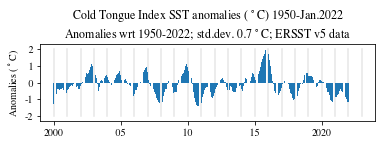

In [40]:
# Plot recent CTI
print( f"Standard deviation for 1950-22: {np.nanstd(tsanom)}" )
plt.clf()
fig, ax = plt.subplots()
plt.bar( np.arange(23*12), tpm.time_shift(tsanom,yr1,yr2,2000,yr2), zorder=15 )
plt.gca().set_ylim( ( -2.3, 2.3 ))
plt.gca().set_xlim( ( -12, 24*12 ))
xtick_values = np.arange( 0, 26*12+12, step=60 ) 
print(xtick_values)
plt.xticks( np.arange(0,300,60), ('2000', ' 05 ', ' 10 ', ' 15 ', \
   '2020' ), fontdict=font )
plt.yticks( np.arange(-2,3,1), ( '-2', '-1', ' 0', ' 1', ' 2' ), fontdict=font )

tpm.plot_vertical_lines( np.arange( 0,24*12, 12 ),( -2, 2 ), zorder=5 )
plt.title( r'Cold Tongue Index SST anomalies ($^\circ$C) 1950-Jan.2022' 
          '\n' 
          r'Anomalies wrt 1950-2022; std.dev. 0.7$^\circ$C; ERSST v5 data', \
          fontdict=font )
ax.set_aspect(15) 
plt.ylabel( 'Anomalies ($^\circ$C)', fontdict=font )
plt.savefig( 'cti20002022sm.png', dpi=750 )
plt.show()

In [43]:
help(tpm.write_ts)

Help on function write_ts in module tpm:

write_ts(ts, yr1, yr2, yrfst=None)
    write_ts( ts, yr1, yr2 ) writes a monthly timeseries in table form to stdio.
    
    This is the beginning of converting write_ts.m to python.
    
     Todd Mitchell, February 2019



In [50]:
import inspect
lines = inspect.getsource( tpm.write_ts )
print( lines )

def write_ts( ts, yr1, yr2, yrfst=None ):
    '''write_ts( ts, yr1, yr2 ) writes a monthly timeseries in table form to stdio.

    This is the beginning of converting write_ts.m to python.

     Todd Mitchell, February 2019 '''

    import numpy as np
    import sys
    
    if yrfst is None:
        yrfst = yr1

    nyr = yr2 - yr1 + 1
    
    print( 'ts.shape yields', ts.shape )

    a = np.reshape( np.round( ts*10 ), ( nyr, 12 ) )
    a[ np.isnan(a) ] = -999
    b = np.arange( yr1, yr2+1 )
    b = np.expand_dims( b, axis=1 )
    b = np.concatenate( ( b, a ), axis=1 ).astype(int)
    np.savetxt( sys.stdout, b, fmt='%5d%5d%5d%5d%5d%5d%5d%5d%5d%5d%5d%5d%5d' )



In [51]:
tpm.write_ts( tsanom*10, 1950, 2022 )  # write monthly time series out one-year-per-line

ts.shape yields (876,)
 1950 -119  -99  -65  -71  -86  -62  -49  -36  -48  -42  -70  -58
 1951  -41  -31   12   33   43   46   83   67   75   81   97   72
 1952   45   27   23   33   16  -13  -24  -11   -5  -17  -35   -6
 1953   36   47   50   55   59   66   50   46   58   50   49   67
 1954   51   38    7  -67  -50  -56  -63  -73  -92  -90  -66  -78
 1955  -38  -31  -47  -52  -70  -62  -58  -70  -88 -146 -160 -130
 1956  -76  -45  -29  -29  -26  -28  -47  -58  -53  -55  -64  -56
 1957  -28    7   41   58   68   73   93   97   83   87  107  128
 1958  142  126   94   72   65   49   35   28    4   13   32   20
 1959   48   37   31   41   14    0  -28  -25  -24    2  -11   -3
 1960   -1  -16    0    4   -1  -11  -12    3    4  -24  -25  -11
 1961   -8    7   -8   -1    4   10  -32  -43  -63  -64  -28  -23
 1962  -23  -12  -24  -41  -49  -37  -32  -14  -39  -41  -49  -57
 1963  -34  -21   12   21    5   20   63   71   75   82   82   90
 1964   73   36    0  -43  -69  -72  -46  -75  -67  -

In [54]:
x = np.where( np.isnan(tsanom)==False )[0]
tsanom[x[-10:]]

array([-0.67542007, -0.5133361 , -0.38136726, -0.4697615 , -0.55549357,
       -0.63458965, -0.8402973 , -0.96992334, -1.16332232, -1.1284337 ])

In [57]:
np.corrcoef( tsanom[x], tsbanom[x])
# The CTI and global-mean SST monthly, unfiltered timeseries are correlated at 0.18 .

array([[1.       , 0.1844335],
       [0.1844335, 1.       ]])